### Topic: Challenge Set 7
### Subject: House Voting Data, Movies, and Cancer Survival
### Date: 02/04/2018
### Name: Subramanian Iyer
### Worked With: Worked Individually

### **Challenge Number 1**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
df = pd.read_csv(url, header = None, names = ['Party'] + ['v'+str(i) for i in range(1,17)])
def numify(i):
    if i =='y':
        return 1
    elif i =='n':
        return 0
    else:
        return np.nan
for i in range(1,17):
    df['v'+str(i)] = [numify(j) for j in df['v'+str(i)]]
df.fillna(df.mean(), inplace = True)
df.head()

,Party,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


### **Challenge Number 2**

In [2]:
from sklearn.cross_validation import train_test_split
y = df['Party']
X = df[['v' + str(i) for i in range(1,17)]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 4444)

/Users/subramanianiyer/anaconda2/envs/mypython3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### **Challenge Number 3**

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc = []
for i in range(20):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
acc = np.array(acc)
print([x + 1 for x in np.where(acc==acc.max())])
print(acc.max())
print(acc)

[array([ 6,  9, 10])]
0.931297709924
[ 0.90076336  0.89312977  0.90076336  0.90076336  0.91603053  0.93129771
  0.91603053  0.92366412  0.93129771  0.93129771  0.92366412  0.92366412
  0.92366412  0.92366412  0.92366412  0.92366412  0.92366412  0.91603053
  0.91603053  0.91603053]


K values of 6, 9, and 10 give the highest accuracy for this test/train split.

### **Challenge Number 4**

In [4]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=4444)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.93893129771


### **Challenge Number 5**

267
168


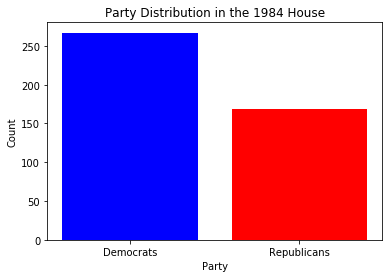

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
print(len(df[df.Party=='democrat']))
print(len(df[df.Party=='republican']))
dems = len(df[df.Party=='democrat'])
reps = len(df[df.Party=='republican'])
plt.bar([1,2],height = [dems,reps],tick_label = ['Democrats', 'Republicans'], color = ['blue', 'red'])
plt.title('Party Distribution in the 1984 House')
plt.xlabel('Party')
plt.ylabel('Count')
def demPred(y):
    return ['democrat']*len(y)
def repPred(y):
    return ['republican']*len(y)

In [6]:
print(accuracy_score(y_test, demPred(X_test)))
print(accuracy_score(y_test, repPred(X_test)))

0.587786259542
0.412213740458


There are 267 democrats and 168 republicans.

### **Challenge Number 6**

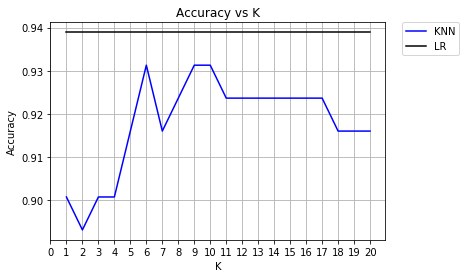

In [7]:
plt.plot(range(1,21), acc, label = 'KNN', color = 'blue')
plt.plot(range(1,21), [accuracy_score(y_test, y_pred)]*20, label = 'LR', color = 'black')
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(np.arange(21))
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

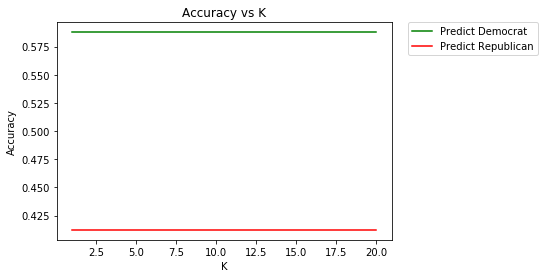

In [8]:
plt.plot(range(1,21), [accuracy_score(y_test, demPred(X_test))]*20, label = 'Predict Democrat', color = 'green')
plt.plot(range(1,21), [accuracy_score(y_test, repPred(X_test))]*20, label = 'Predict Republican', color = 'red')
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### **Challenge Number 7**

Text(0.5,1,'LR learning Curve')

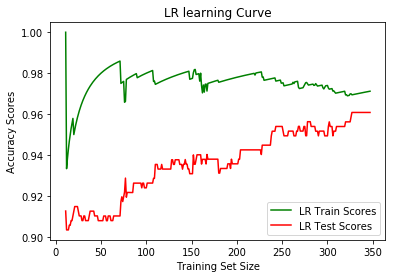

In [9]:
from sklearn.model_selection import learning_curve
sizes = range(11,int(len(df)*(.8)))
mLR, trainScoresLR, testScoresLR = learning_curve(LogisticRegression(random_state=4444), X, y, train_sizes = sizes, cv = 5)
trainScoresLR = np.mean(trainScoresLR, axis=1)
testScoresLR = np.mean(testScoresLR, axis=1)

mKNN6, trainScoresKNN6, testScoresKNN6 = learning_curve(KNeighborsClassifier(n_neighbors = 6), X, y, train_sizes = sizes, cv = 5)
trainScoresKNN6 = np.mean(trainScoresKNN6, axis=1)
testScoresKNN6 = np.mean(testScoresKNN6, axis=1)

mKNN9, trainScoresKNN9, testScoresKNN9 = learning_curve(KNeighborsClassifier(n_neighbors = 9), X, y, train_sizes = sizes, cv = 5)
trainScoresKNN9 = np.mean(trainScoresKNN9, axis=1)
testScoresKNN9 = np.mean(testScoresKNN9, axis=1)

mKNN10, trainScoresKNN10, testScoresKNN10 = learning_curve(KNeighborsClassifier(n_neighbors = 10), X, y, train_sizes = sizes, cv = 5)
trainScoresKNN10 = np.mean(trainScoresKNN10, axis=1)
testScoresKNN10 = np.mean(testScoresKNN10, axis=1)

plt.plot(sizes, trainScoresLR, color='green', label='LR Train Scores')
plt.plot(sizes, testScoresLR, color='red', label='LR Test Scores')
plt.ylabel('Accuracy Scores')
plt.xlabel('Training Set Size')
plt.legend(loc='lower right')
plt.title('LR learning Curve')

Text(0.5,1,'KNN (K=6) learning Curve')

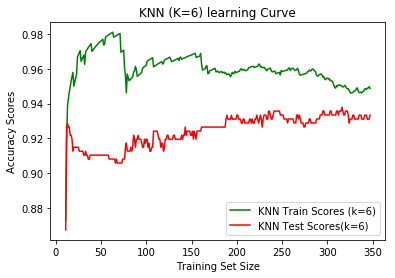

In [10]:
plt.plot(sizes, trainScoresKNN6, color='green', label='KNN Train Scores (k=6)')
plt.plot(sizes, testScoresKNN6, color='red', label='KNN Test Scores(k=6)')
plt.ylabel('Accuracy Scores')
plt.xlabel('Training Set Size')
plt.legend(loc='lower right')
plt.title('KNN (K=6) learning Curve')

Text(0.5,1,'KNN (K=9) learning Curve')

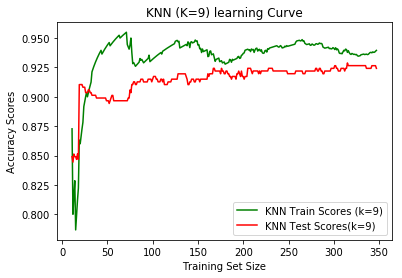

In [11]:
plt.plot(sizes, trainScoresKNN9, color='green', label='KNN Train Scores (k=9)')
plt.plot(sizes, testScoresKNN9, color='red', label='KNN Test Scores(k=9)')
plt.ylabel('Accuracy Scores')
plt.xlabel('Training Set Size')
plt.legend(loc='lower right')
plt.title('KNN (K=9) learning Curve')

Text(0.5,1,'KNN (K=10) learning Curve')

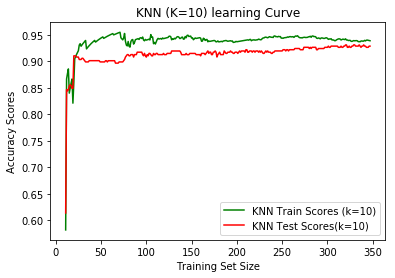

In [12]:
plt.plot(sizes, trainScoresKNN10, color='green', label='KNN Train Scores (k=10)')
plt.plot(sizes, testScoresKNN10, color='red', label='KNN Test Scores(k=10)')
plt.ylabel('Accuracy Scores')
plt.xlabel('Training Set Size')
plt.legend(loc='lower right')
plt.title('KNN (K=10) learning Curve')

### **Challenge Number 8**

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.93893129771


In [14]:
from sklearn.svm import SVC
sv = SVC(random_state = 4444)
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.954198473282


In [15]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state = 4444)
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.93893129771


In [16]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 4444)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.954198473282


### **Challenge Number 9**

In [17]:
from sklearn.cross_validation import cross_val_score
for i in range(1,21):
    print('KNN' + ' (K = ' + str(i) + '): ', end = '')
    print(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors = i), X, y, cv = 5)))
print('LR: ', end = '')
print(np.mean(cross_val_score(LogisticRegression(random_state=4444), X, y, cv = 5)))
print('GNB: ', end = '')
print(np.mean(cross_val_score(GaussianNB(), X, y, cv=5)))
print('SVC: ', end = '')
print(np.mean(cross_val_score(SVC(random_state=4444), X, y, cv=5)))
print('DTC: ', end = '')
print(np.mean(cross_val_score(DecisionTreeClassifier(random_state = 4444), X, y, cv=5)))
print('RF: ', end = '')
print(np.mean(cross_val_score(RandomForestClassifier(random_state = 4444), X, y, cv=5)))

KNN (K = 1): 0.933088503317
KNN (K = 2): 0.94239022138
KNN (K = 3): 0.933405020534
KNN (K = 4): 0.942522660446
KNN (K = 5): 0.93332604311
KNN (K = 6): 0.93332604311
KNN (K = 7): 0.928833442687
KNN (K = 8): 0.931053315837
KNN (K = 9): 0.924182279896
KNN (K = 10): 0.928727734441
KNN (K = 11): 0.928780588564
KNN (K = 12): 0.924182279896
KNN (K = 13): 0.924182279896
KNN (K = 14): 0.921856698501
KNN (K = 15): 0.924182279896
KNN (K = 16): 0.926455007169
KNN (K = 17): 0.924208403198
KNN (K = 18): 0.926481130471
KNN (K = 19): 0.921935675925
KNN (K = 20): 0.921935675925
LR: 0.958483997959
GNB: 0.940144224928
SVC: 0.953965274234
DTC: 0.935439600496
RF: 0.960783456052


### **Challenge Number 10**

In [18]:
df1 = pd.read_csv(url, header = None, names = ['Party'] + ['v'+str(i) for i in range(1,17)])
def numify(i):
    if i =='y':
        return 1
    elif i =='n':
        return 0
    else:
        return np.nan
for i in range(1,17):
    df1['v'+str(i)] = [numify(j) for j in df1['v'+str(i)]]
    df1['v'+str(i)] = df1['v' + str(i)].fillna(df1['v'+str(i)].mode()[0])
df1.head()

,Party,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [19]:
y1 = df1['v1']
X1 = df1[['v' + str(i) for i in range(2,17)]]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .30, random_state = 4444)
lr1 = LogisticRegression(random_state=4444)
lr1.fit(X1_train, y1_train)
y1_pred = lr1.predict(X1_test)
print(accuracy_score(y1_test, y1_pred))
print('LR CV Score: ', end = '')
print(np.mean(cross_val_score(LogisticRegression(random_state=4444), X1, y1, cv = 5)))

0.671755725191
LR CV Score: 0.666525114821


### **Challenge Number 11**

In [20]:
df2 = pd.read_csv('2013_movies.csv')
df2.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [21]:
print(df2['Rating'].unique())

['PG-13' 'PG' 'G' 'R']


In [22]:
df2.dropna(inplace=True)

Text(0,0.5,'Count')

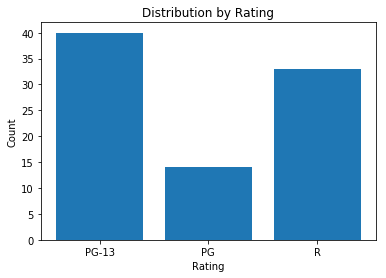

In [23]:
h = []
for i in df2['Rating'].unique():
    h.append(len(df2[df2['Rating']==i]))
plt.bar(range(1,len(h)+1),height = h,tick_label = df2['Rating'].unique())
plt.title('Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

In [24]:
del df2['ReleaseDate']
del df2['Director']
del df2['Title']
df2['Budget'] = (df2.Budget - min(df2.Budget))/(max(df2.Budget)-min(df2.Budget))
df2['DomesticTotalGross'] = (df2.DomesticTotalGross - min(df2.DomesticTotalGross))/(max(df2.DomesticTotalGross)-min(df2.DomesticTotalGross))
df2['Runtime'] = (df2.Runtime - min(df2.Runtime))/(max(df2.Runtime)-min(df2.Runtime))
y2 = df2['Rating']
X2 = df2[[v for v in df2.columns.values if v != 'Rating']]

In [25]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .30, random_state = 4444)
acc = []
for i in range(20):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(X2_train, y2_train)
    y2_pred = knn.predict(X2_test)
    acc.append(accuracy_score(y2_test, y2_pred))
acc = np.array(acc)
print([x + 1 for x in np.where(acc==acc.max())])
print(acc.max())
print(acc)

[array([4])]
0.62962962963
[ 0.51851852  0.48148148  0.55555556  0.62962963  0.55555556  0.59259259
  0.48148148  0.51851852  0.55555556  0.44444444  0.48148148  0.48148148
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.48148148]


In [26]:
lr2 = LogisticRegression(random_state=4444)
lr2.fit(X2_train, y2_train)
y2_pred = lr2.predict(X2_test)
print(accuracy_score(y2_test, y2_pred))

0.481481481481


In [27]:
def stupPred(x):
    return ['PG-13']*len(x)
print(accuracy_score(y2_test, stupPred(X2_test)))

0.407407407407


In [28]:
print(lr2.coef_)
print(lr2.intercept_)

[[-0.15424741  0.2826913  -1.25885433]
 [ 1.79713906  0.07769138  0.43807268]
 [-2.07865552 -0.56160271  0.28786404]]
[-1.21026262 -0.75823828  0.10664113]


KNN (K=4) beats the baseline by 0.22222222259 accuracy. LR beats the baseline by 0.07407407407 accuracy.  The coefficients indicate that a high budget and, to a lesser extent, a longer runtime, is indicative of a PG-13 movie. A shorter runtime is indicative of a PG movie, while a low budget is indicative of an R movie.

### **Challenge Number 12**

In [29]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
df3 = pd.read_csv(url, header = None, names = ['Age','Year','Nodes','Status'])

In [30]:
print(np.mean(df3['Age']))
print(np.std(df3['Age']))

52.45751633986928
10.78578520363183


In [31]:
print(np.mean(df3[df3.Status==1]['Age']))
print(np.std(df3[df3.Status==1]['Age']))

52.01777777777778
10.98765547510051


In [32]:
print(np.mean(df3[df3.Status==2]['Age']))
print(np.std(df3[df3.Status==2]['Age']))

53.67901234567901
10.10418219303131


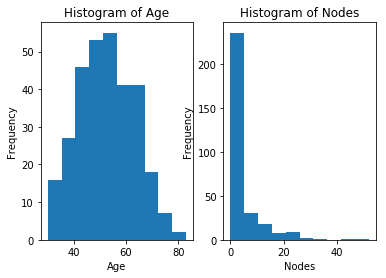

In [33]:
f, ax = plt.subplots(1,2)
ax[0].hist(df3.Age)
ax[0].set_title('Histogram of Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')
ax[1].hist(df3.Nodes)
ax[1].set_title('Histogram of Nodes')
ax[1].set_xlabel('Nodes')
ax[1].set_ylabel('Frequency');

In [34]:
print('19'+str(min(df3.Year)))
print('19'+str(max(df3.Year)))

1958
1969


In [35]:
W = df3[['Age', 'Year', 'Nodes']]
z = df3['Status']
W_train, W_test, z_train, z_test = train_test_split(W, z, test_size = .30, random_state = 4444)
WminAge = min(W_train['Age'])
WmaxAge = max(W_train['Age'])
WminYear = min(W_train['Year'])
WmaxYear = max(W_train['Year'])
WminNodes = min(W_train['Nodes'])
WmaxNodes = max(W_train['Nodes'])
W_train['Age'] = [(x-WminAge)/(WmaxAge-WminAge) for x in W_train['Age']]
W_train['Year'] = [(x-WminYear)/(WmaxYear-WminYear) for x in W_train['Year']]
W_train['Nodes'] = [(x-WminNodes)/(WmaxNodes-WminNodes) for x in W_train['Nodes']]
W_test['Age'] = [(x-WminAge)/(WmaxAge-WminAge) for x in W_test['Age']]
W_test['Year'] = [(x-WminYear)/(WmaxYear-WminYear) for x in W_test['Year']]
W_test['Nodes'] = [(x-WminNodes)/(WmaxNodes-WminNodes) for x in W_test['Nodes']]
lr = LogisticRegression(random_state=4444)
lr.fit(W_train, z_train)
z_pred = lr.predict(W_test)
print(accuracy_score(z_test, z_pred))

0.804347826087


In [36]:
print(lr.coef_)

[[ 0.3324903  -0.02887519  1.81837138]]


Text(0.5,1,'LR learning Curve')

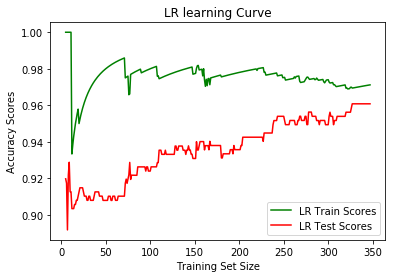

In [37]:
sizes = range(5,int(len(df)*(.8)))
mLR, trainScoresLR, testScoresLR = learning_curve(LogisticRegression(random_state=4444), X, y, train_sizes = sizes, cv = 5)
trainScoresLR = np.mean(trainScoresLR, axis=1)
testScoresLR = np.mean(testScoresLR, axis=1)
plt.plot(sizes, trainScoresLR, color='green', label='LR Train Scores')
plt.plot(sizes, testScoresLR, color='red', label='LR Test Scores')
plt.ylabel('Accuracy Scores')
plt.xlabel('Training Set Size')
plt.legend(loc='lower right')
plt.title('LR learning Curve')

A higher age and more nodes is indicative of not surviving to the 5 year mark, while a more recent year is indicative of surviving to the 5 year mark.